In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

# Scratch
from KNN import KNN as KNN_Scratch

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

#data = pd.get_dummies(data)
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Preprocessing

In [3]:
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [4]:
data = data.drop(data[data['Administrative_Duration'] < 0].index)
data = data.drop(data[data['Informational_Duration'] < 0].index)
data = data.drop(data[data['ProductRelated_Duration'] < 0].index)

In [5]:
data = data.dropna()

In [6]:
# Transformation of revenue that was a boolean into a value. It has transformed true revenue into ones.
le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Month'] = le.fit_transform(data['Month'])

In [7]:
data[['Administrative','Month', ]].head(2)

,Administrative,Month
0,0.0,2
1,0.0,2


In [8]:
X = data
X = X.drop(['Revenue'], axis=1); #Axis = 0 drops row and Axis=1 drops column
y = data['Revenue']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 211)

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
model = RandomForestClassifier(max_depth = 3)
model.fit(X_train, y_train);

In [12]:
print("Test set accuracy random forest: {:.2f}".format(model.score(X_test, y_test)))

Test set accuracy random forest: 0.84


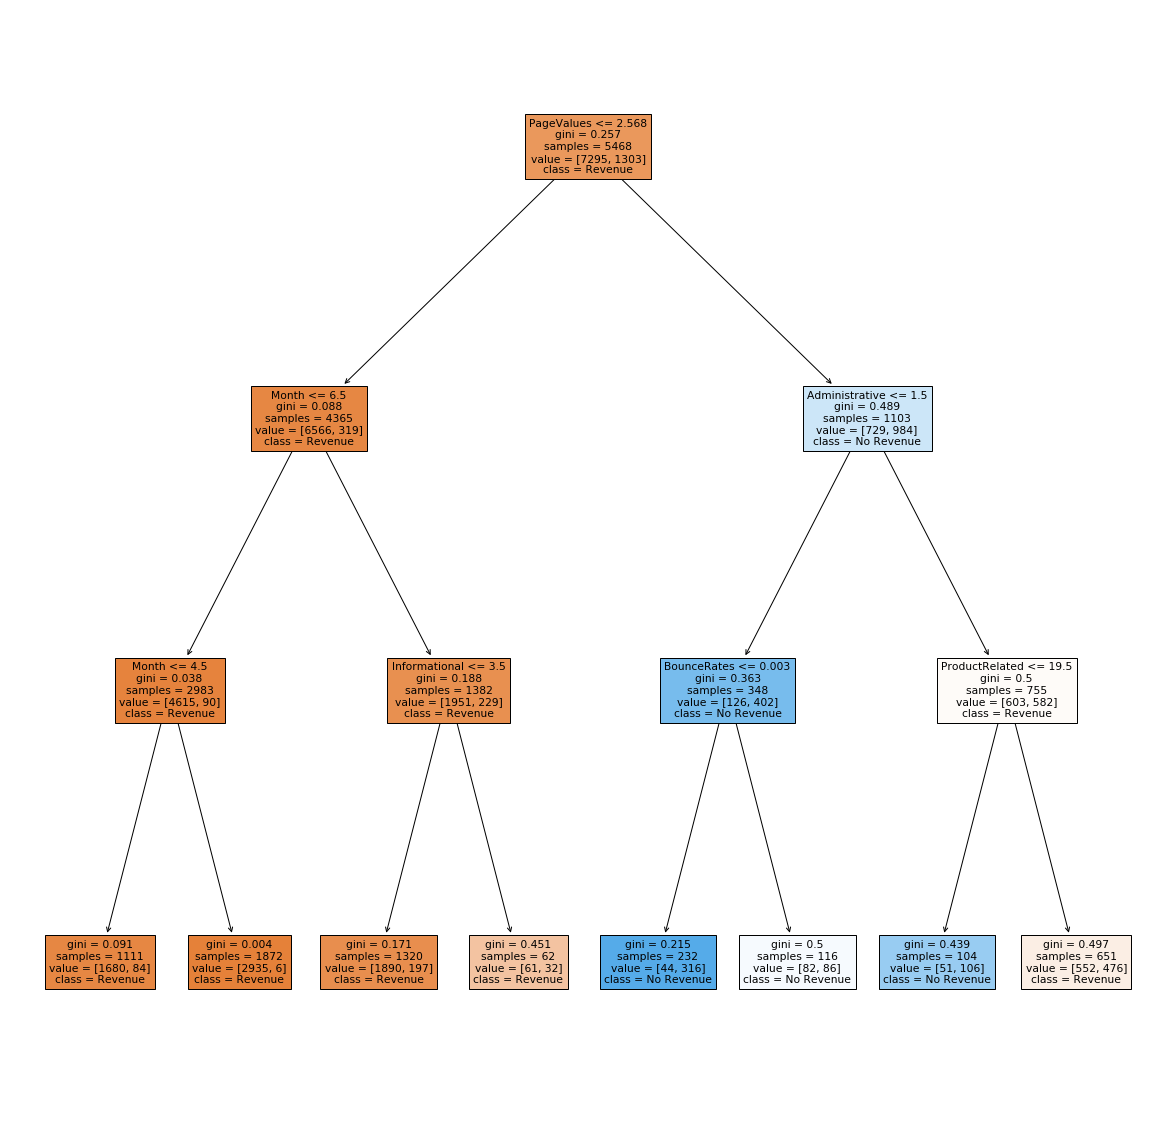

In [13]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=X.columns, class_names = ["Revenue", "No Revenue"], filled=True)

In [14]:
from sklearn.model_selection import GridSearchCV
'''
param_grid = {
    'n_estimators' : [60,75,90,115,130],
    'max_depth' : [7,14,21,28],
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split': [2,4,6,8]
}
gridsearch = GridSearchCV(estimator=rfclf,param_grid=param_grid,verbose = 1)
gridsearch.fit(x,y)
''';

# K-Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = []
accuracy = []

for i in range(1,12):
    
    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Neighbors: {}, test set accuracy: {}".format(i, acc))
    
    num_neighbors.append(i)
    accuracy.append(acc)
    

Neighbors: 1, test set accuracy: 0.8265943012211668
Neighbors: 2, test set accuracy: 0.8569877883310719
Neighbors: 3, test set accuracy: 0.858887381275441
Neighbors: 4, test set accuracy: 0.8591587516960651
Neighbors: 5, test set accuracy: 0.8550881953867029
Neighbors: 6, test set accuracy: 0.8602442333785617
Neighbors: 7, test set accuracy: 0.8569877883310719
Neighbors: 8, test set accuracy: 0.86078697421981
Neighbors: 9, test set accuracy: 0.8605156037991859
Neighbors: 10, test set accuracy: 0.8621438263229309
Neighbors: 11, test set accuracy: 0.8594301221166892


10 Neighbors optimal


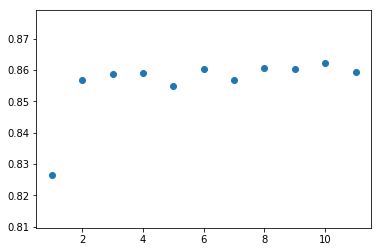

In [16]:
plt.scatter(num_neighbors, accuracy)
print("10 Neighbors optimal")

# KNN Scratch

In [17]:
X_train.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                      int64
dtype: object

In [18]:
X_test.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                      int64
dtype: object

In [19]:
model = KNN_Scratch(k=3)
model.fit(X_train.values, y_train.values)
predictions = model.predict(X_test.values)

run_time = model.end_time - model.start_time


In [33]:
acc = sum(predictions==y_test)/len(predictions)
print('Accuracy from KNN Scratch: ' + str(acc))

Accuracy from KNN Scratch: 0.858887381275441


In [37]:
print("Run time for knn from scratch: ", run_time, "s")

Run time for knn from scratch:  266.2285876274109 s


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

c:\python35\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
acc = model.score(X_test, y_test)
acc

0.8732700135685211

# Support Vector Machine SVM

In [23]:
from sklearn.svm import SVC
param_grid = {'C':[0.1,0.5,1,50,150],
              'gamma' : [0.1,1,10,100,1000]}

In [24]:
model = SVC()
model.fit(X_train,y_train)
acc = model.score(X_test, y_test)

In [25]:
acc

0.841248303934871

#### Finding optimal parameters

In [26]:
#param_grid = {'C':[0.1,1,10,100,1000],
#              'kernel':['rbf'],
#              'gamma' : [0.1,1,10,100,1000]}
#gridsearch = GridSearchCV(SVC(),param_grid = param_grid,verbose = 1)
#gridsearch.fit(X_train,y_train)

# Bayesian Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
model = GaussianNB()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)

In [29]:
acc

0.8379918588873813